In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

! pip install openpyxl

In [2]:
df_preprocessed = pd.read_csv("G:/Mi unidad/1. PROYECTOS/DM project/2nd delivery/df_preprocessed.csv", index_col = 0)

In [3]:
df_preprocessed.head()

,age,campus_discrimination,academic_year,sleep,outdoor_activities,religious_activities,sports,creative_activities,social_activities,online_entertainment,...,sports_engagement,average_sleep,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,isolation,future_insecurity
1,21.0,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,...,7+ times,2-4 hrs,-0.025053,-0.914260,-0.536518,0.208732,-0.073726,0.830714,0.119784,-0.025765
2,20.0,0.0,3.0,1.0,0.0,1.0,1,0.0,1.0,1.0,...,No Sports,4-6 hrs,0.998654,0.855402,0.077229,-0.411808,0.016025,-0.419056,-0.353110,7.559002
3,19.0,0.0,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,...,No Sports,4-6 hrs,-0.212648,-0.405081,0.399843,2.568354,1.474124,-0.015688,-0.380982,0.250939
4,20.0,1.0,3.0,0.0,0.0,0.0,1,0.0,0.0,1.0,...,No Sports,7-8 hrs,-0.513606,0.585132,0.571831,-0.241192,-0.113502,3.241716,2.914062,-0.061997
5,19.0,1.0,1.0,0.0,0.0,1.0,1,0.0,1.0,1.0,...,No Sports,7-8 hrs,6.860397,0.427101,-0.252513,-0.299193,1.474124,-0.321030,-0.267431,-0.319389


In [4]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10810 entries, 1 to 11070
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10810 non-null  float64
 1   campus_discrimination  10810 non-null  float64
 2   academic_year          10810 non-null  float64
 3   sleep                  10810 non-null  float64
 4   outdoor_activities     10810 non-null  float64
 5   religious_activities   10810 non-null  float64
 6   sports                 10810 non-null  int64  
 7   creative_activities    10810 non-null  float64
 8   social_activities      10810 non-null  float64
 9   online_entertainment   10810 non-null  float64
 10  gender                 10810 non-null  object 
 11  degree_major           10810 non-null  object 
 12  residential_status     10810 non-null  object 
 13  sports_engagement      10810 non-null  object 
 14  average_sleep          10810 non-null  object 
 15  study_s

In [5]:
df_preprocessed_clustering = df_preprocessed.iloc[:, 15:25].copy()

In [6]:
df_preprocessed_clustering.describe().T

,count,mean,std,min,25%,50%,75%,max
study_satisfaction,10810.0,0.346413,1.223586,-0.513606,-0.400160,0.000000,0.599840,6.860397
academic_workload,10810.0,0.023294,0.667371,-0.914260,-0.540937,0.000000,0.459063,1.505783
academic_pressure,10810.0,0.634248,2.053417,-0.536518,-0.353897,0.000000,0.646103,10.013641
financial_concerns,10810.0,1.078539,2.911077,-0.448460,-0.352715,0.000000,0.647285,10.698770
social_relationships,10810.0,1.059857,2.650708,-0.489843,-0.217017,0.016025,0.782983,8.621761
depression,10810.0,0.900510,2.415676,-0.450965,-0.321030,0.000000,0.669358,9.005821
isolation,10810.0,0.953149,2.445448,-0.380982,-0.290214,0.000000,0.707750,8.737159
future_insecurity,10810.0,0.884730,2.277618,-0.405167,-0.292902,0.000000,0.707098,7.559002


VARIANZA EXPLICADA POR COMPONENTES PRINCIPALES:
PC1: 0.3162
PC2: 0.2019
PC3: 0.1760
PC4: 0.1064

VARIANZA ACUMULADA:
PC1-PC1: 0.3162
PC1-PC2: 0.5181
PC1-PC3: 0.6942
PC1-PC4: 0.8005


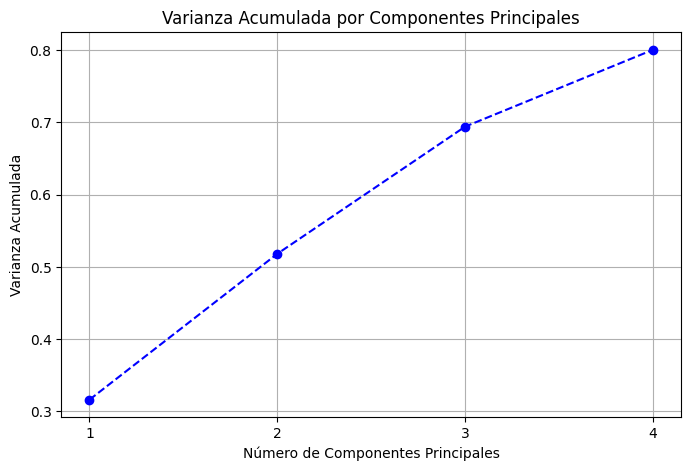

In [7]:
from sklearn.decomposition import PCA
n_components = 4
pca = PCA(n_components=n_components)
pca_components = pca.fit_transform(df_preprocessed_clustering)

# Convertir las componentes principales a un DataFrame
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(n_components)])

# ---- Varianza Explicada ----
explained_variance = pca.explained_variance_ratio_  # Varianza explicada por cada componente
cumulative_variance = np.cumsum(explained_variance)  # Varianza acumulada

# ---- Imprimir la varianza explicada ----
print("VARIANZA EXPLICADA POR COMPONENTES PRINCIPALES:")
for i in range(n_components):
    print(f'PC{i+1}: {explained_variance[i]:.4f}')

print("\nVARIANZA ACUMULADA:")
for i in range(n_components):
    print(f'PC1-PC{i+1}: {cumulative_variance[i]:.4f}')

# ---- Gráfico de varianza acumulada ----
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.xticks(range(1, n_components + 1))
plt.grid(True)
plt.show()


In [8]:
pca_df.head()

,PC1,PC2,PC3,PC4
0,-1.458319,0.709197,-1.236780,-0.359410
1,0.264585,-1.394407,-0.969313,5.764785
2,-0.801469,1.440720,1.537748,0.194956
3,1.475414,-0.951239,-2.585349,-1.747402
4,-2.865878,0.081782,0.689873,-0.646103


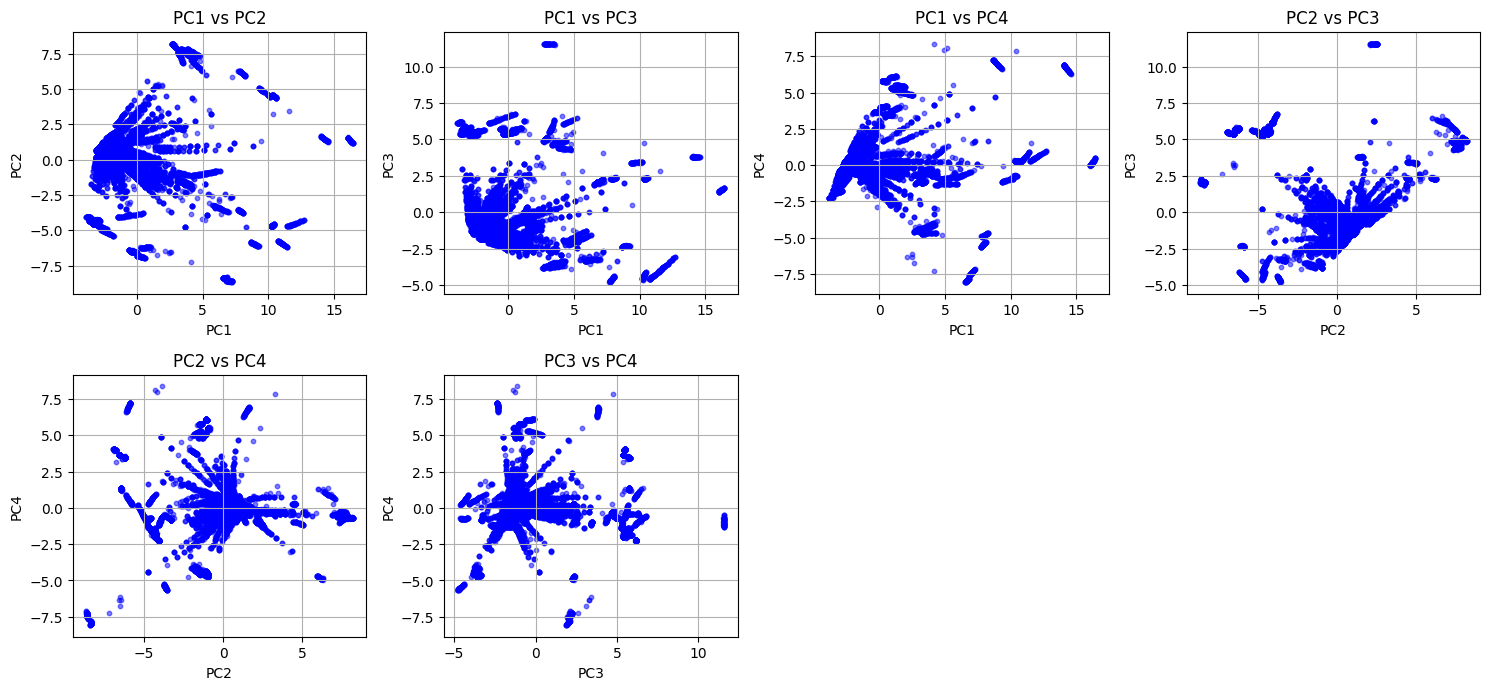

In [9]:
# Obtener pares de componentes principales
pairs = [(i, j) for i in range(4) for j in range(i+1, 4)]

# Crear gráficos para cada par
plt.figure(figsize=(15, 10))
for idx, (x, y) in enumerate(pairs):
    plt.subplot(3, 4, idx + 1)
    plt.scatter(pca_df.iloc[:, x], pca_df.iloc[:, y], alpha=0.5, color='b', s=10)
    plt.xlabel(f'PC{x+1}')
    plt.ylabel(f'PC{y+1}')
    plt.title(f'PC{x+1} vs PC{y+1}')
    plt.grid(True)

plt.tight_layout()
plt.show()

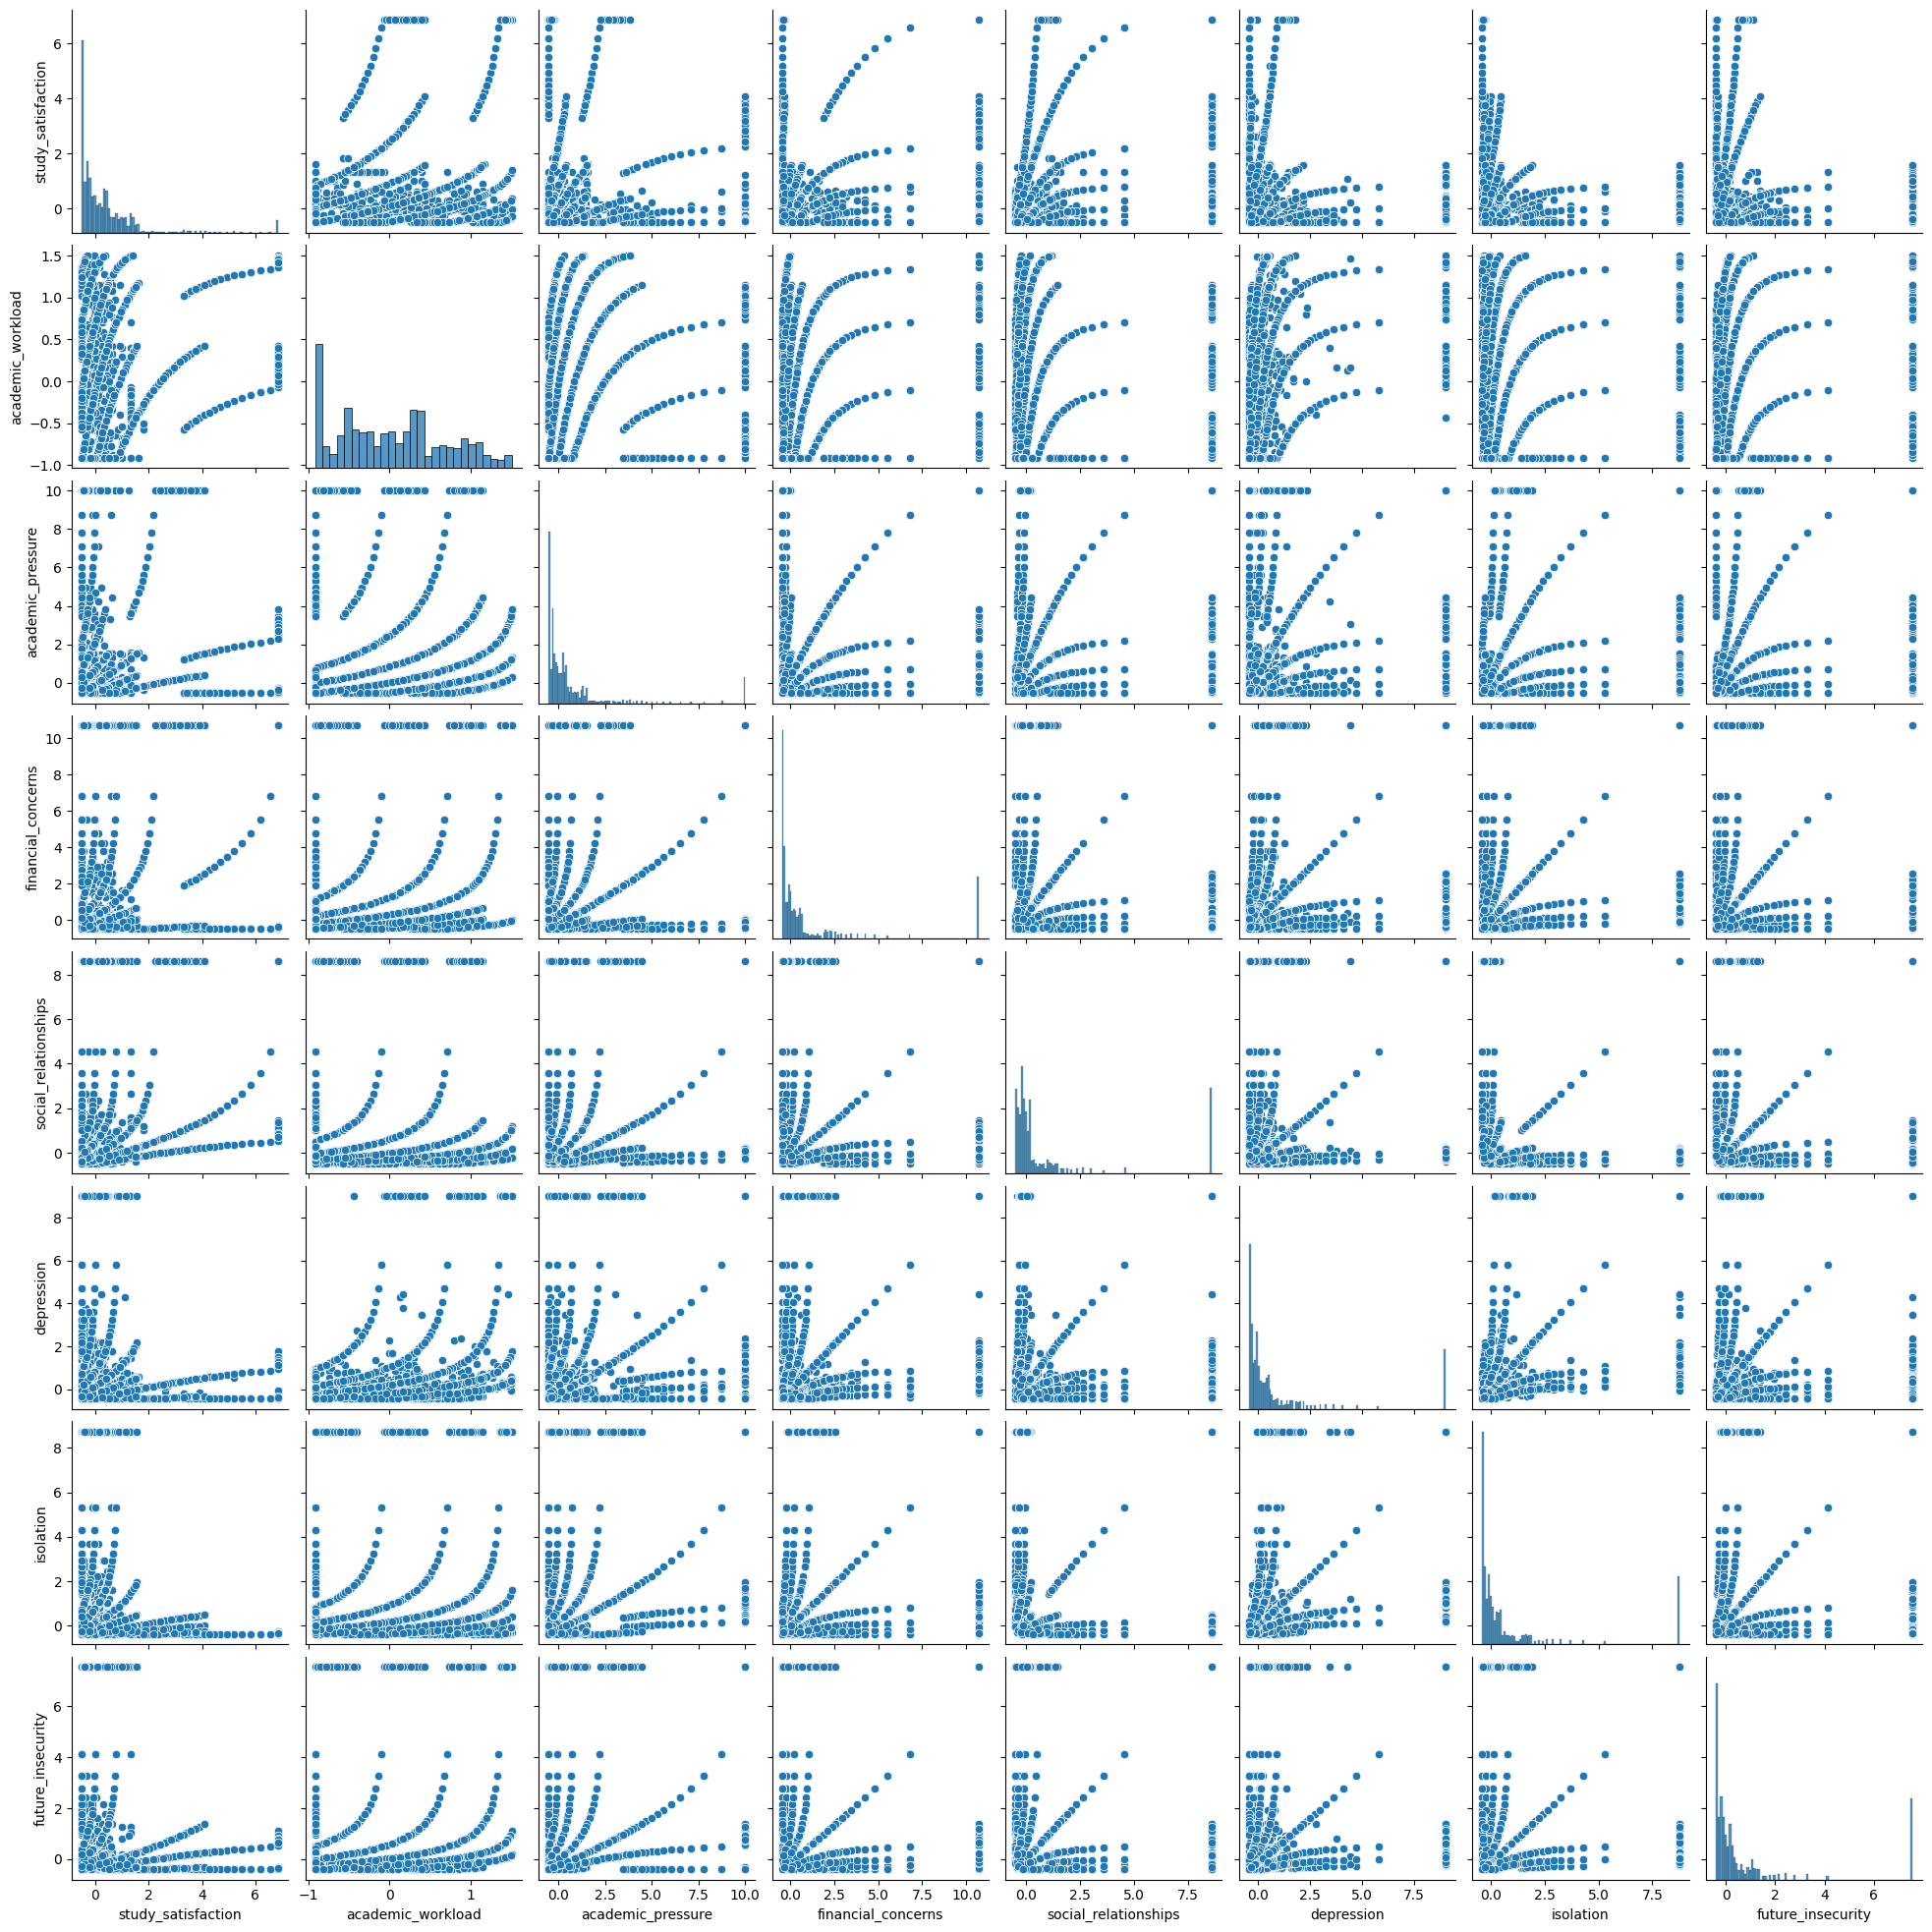

In [10]:
import seaborn as sns
sns.pairplot(df_preprocessed_clustering)

Parece que estas variables están siguiendo distribuciones bimodales

Gracias por aclarar que ya intentaste la transformación Yeo-Johnson y obtuviste una imagen similar a la que mostraste antes. Si aún tienes problemas con la formación de clusters homogéneos, esto sugiere que la transformación no está resolviendo el problema de la concentración de los datos en los bordes o las distribuciones sesgadas.

Vamos a revisar algunas posibles causas y ajustes que podrían ayudarte a mejorar los resultados del clustering:

1. Revise la aplicabilidad de Yeo-Johnson:
La transformación Yeo-Johnson es adecuada para datos con distribuciones sesgadas, pero en algunos casos (por ejemplo, cuando los datos tienen múltiples modos o una concentración muy fuerte en los bordes) puede no ser suficiente para obtener distribuciones más equilibradas. Dado que tus datos tienen una concentración hacia los bordes (cerca de 0 y 100), la transformación logarítmica podría ser más efectiva si hay valores pequeños que se pueden "comprimir".

En lugar de Yeo-Johnson, podrías intentar:

Transformación logarítmica para las variables que tienen una gran concentración en los bordes. Solo ten en cuenta que si hay valores cercanos a 0, deberías agregar un pequeño valor constante antes de aplicar el logaritmo.
2. Combinación de transformaciones:
Si una sola transformación no es suficiente, podrías intentar usar una combinación de transformaciones para abordar diferentes problemas en las distribuciones. Por ejemplo:

Transformación logarítmica para manejar valores grandes en las colas.
Escalado (Min-Max o Z-score) para asegurar que todas las variables estén en la misma escala.
Es posible que, al combinar transformaciones, puedas lograr una distribución más simétrica que ayude al clustering.

# K-MEANS

## Selecting the optimal number of clusters

In [11]:
df_preprocessed_kmeans = pca_df.copy()

In [12]:
from sklearn.cluster import KMeans

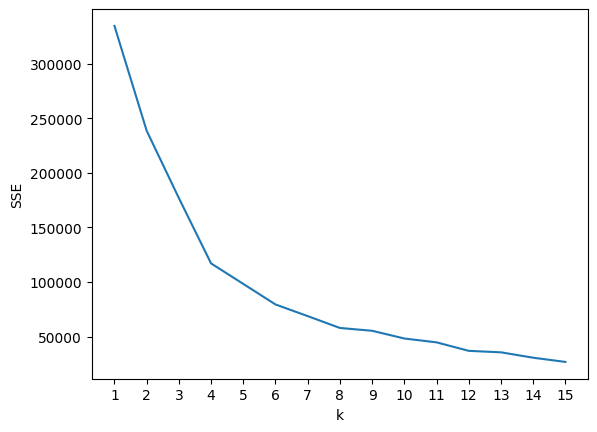

In [13]:
ks = range(1, 16)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_preprocessed_kmeans)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
hclustering = linkage(df_preprocessed_kmeans, 'ward')
#hclustering = linkage(df_prod, 'single')
#hclustering = linkage(df_prod, 'complete')
#hclustering = linkage(df_prod, 'average')

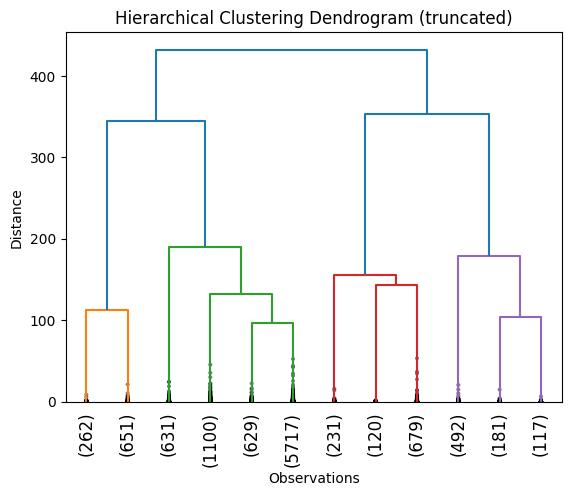

In [16]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

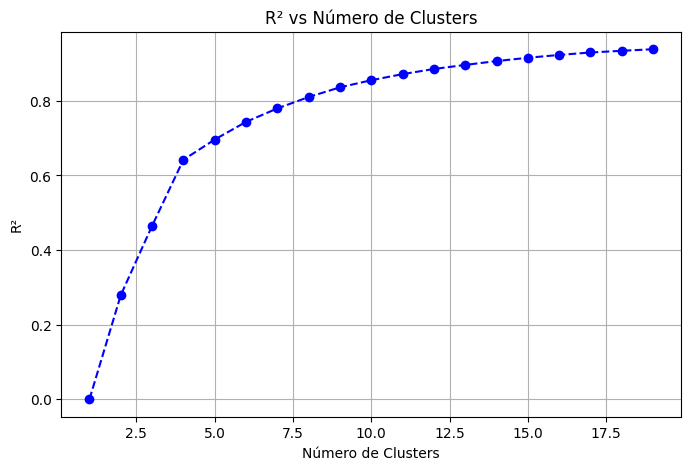

In [17]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

linkage_matrix = linkage(df_preprocessed_kmeans, method='ward')

def calculate_r2(linkage_matrix, data):
    total_ss = np.sum((data - data.mean(axis=0))**2)
    r2_values = []
    max_clusters = data.shape[0]
    
    for k in range(1, min(20, max_clusters)):
        labels = fcluster(linkage_matrix, k, criterion='maxclust')
        clusters_ss = 0
        
        for cluster_id in np.unique(labels):
            cluster_points = data[labels == cluster_id]
            clusters_ss += np.sum((cluster_points - cluster_points.mean(axis=0))**2)
        
        r2 = 1 - (clusters_ss / total_ss)
        r2_values.append(r2)
    
    return r2_values

r2_values = calculate_r2(linkage_matrix, df_preprocessed_kmeans.values)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(r2_values) + 1), r2_values, marker='o', linestyle='--', color='b')
plt.title('R² vs Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('R²')
plt.grid()
plt.show()


## Applying K-means

In [18]:
model = KMeans(n_clusters=3)
model.fit(df_preprocessed_kmeans)
df_preprocessed_kmeans['label'] = model.labels_
df_preprocessed['label'] = model.labels_
df_preprocessed_kmeans

,PC1,PC2,PC3,PC4,label
0,-1.458319,0.709197,-1.236780,-0.359410,1
1,0.264585,-1.394407,-0.969313,5.764785,1
2,-0.801469,1.440720,1.537748,0.194956,1
3,1.475414,-0.951239,-2.585349,-1.747402,1
4,-2.865878,0.081782,0.689873,-0.646103,1
...,...,...,...,...,...
10805,4.677463,7.398214,4.309403,-0.967273,1
10806,-2.415983,1.123815,-1.100586,-0.395994,1
10807,-0.176100,0.621298,-1.520765,-0.053133,1
10808,-3.341763,-4.357760,5.418187,-1.921205,2


## Profiling

In [19]:
descr = df_preprocessed_kmeans.reset_index(drop=True).groupby('label').mean()
print(descr.T)

label         0         1         2
PC1    7.435538 -0.986618 -1.708276
PC2   -1.740112  0.825444 -4.501324
PC3   -1.298187 -0.500336  5.842694
PC4   -1.398414  0.250225 -0.211821


## Silhouette Score for K-means

In [20]:
from sklearn.metrics import silhouette_score

In [67]:
def clusters_scores(X, cluster_algorithm, score_function):
    range_n_clusters = [2, 3, 4, 5]
    scores =[]

    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters value
        clusterer = cluster_algorithm(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        score_avg = score_function(X, cluster_labels)
        scores.append(score_avg)

        print("For n_clusters =", n_clusters, "The average", score_function.__name__, "is :", score_avg)

    return scores

In [68]:
k_means_silhouette = clusters_scores(df_preprocessed_kmeans, KMeans, silhouette_score)

For n_clusters = 2 The average silhouette_score is : 0.5427007465975462
For n_clusters = 3 The average silhouette_score is : 0.5758657738202096
For n_clusters = 4 The average silhouette_score is : 0.6087590715512344
For n_clusters = 5 The average silhouette_score is : 0.5906139264886344


# K-MODES

In [23]:
! pip install kmodes

In [24]:
from kmodes.kmodes import KModes

In [25]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10810 entries, 1 to 11070
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10810 non-null  float64
 1   campus_discrimination  10810 non-null  float64
 2   academic_year          10810 non-null  float64
 3   sleep                  10810 non-null  float64
 4   outdoor_activities     10810 non-null  float64
 5   religious_activities   10810 non-null  float64
 6   sports                 10810 non-null  int64  
 7   creative_activities    10810 non-null  float64
 8   social_activities      10810 non-null  float64
 9   online_entertainment   10810 non-null  float64
 10  gender                 10810 non-null  object 
 11  degree_major           10810 non-null  object 
 12  residential_status     10810 non-null  object 
 13  sports_engagement      10810 non-null  object 
 14  average_sleep          10810 non-null  object 
 15  study_s

In [26]:
df_kmodes = df_preprocessed.iloc[:, 1:15].drop('gender', axis = 1).copy()
df_kmodes.head()

,campus_discrimination,academic_year,sleep,outdoor_activities,religious_activities,sports,creative_activities,social_activities,online_entertainment,degree_major,residential_status,sports_engagement,average_sleep
1,1.0,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,Engineering,Off-Campus,7+ times,2-4 hrs
2,0.0,3.0,1.0,0.0,1.0,1,0.0,1.0,1.0,Engineering,On-Campus,No Sports,4-6 hrs
3,0.0,1.0,0.0,0.0,1.0,1,0.0,0.0,0.0,Data Science,Off-Campus,No Sports,4-6 hrs
4,1.0,3.0,0.0,0.0,0.0,1,0.0,0.0,1.0,Data Science,Off-Campus,No Sports,7-8 hrs
5,1.0,1.0,0.0,0.0,1.0,1,0.0,1.0,1.0,Data Science,Off-Campus,No Sports,7-8 hrs


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 51491.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 51491.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 51491.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 51491.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 51491.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1159, cost: 42222.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1733, cost: 45423.0
Init: initializing centroids
Init: initializing clusters
Starting ite

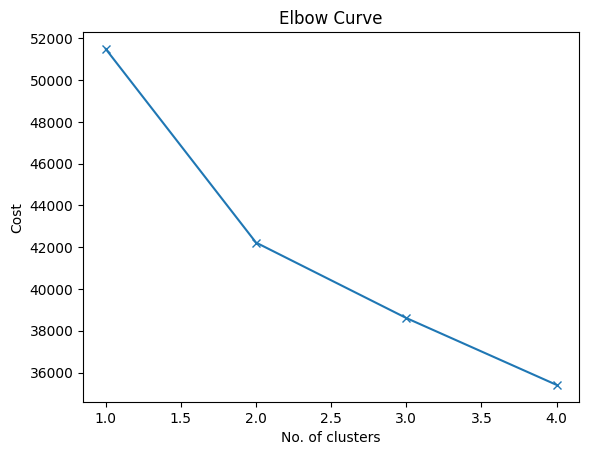

In [27]:
 # importing necessary libraries 
import pandas as pd 
import numpy as np 
# !pip install kmodes 
from kmodes.kmodes import KModes 
import matplotlib.pyplot as plt 
%matplotlib inline 
  
# Elbow curve to find optimal K 
cost = [] 
K = range(1,5) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(df_kmodes) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [28]:
kmodes = KModes(n_clusters=2, random_state=0)
kmodes.fit(df_kmodes)

KModes(n_clusters=2, n_init=1, random_state=0)

In [29]:
df_kmodes = df_kmodes.applymap(str)

In [30]:
df_kmodes['label'] = kmodes.labels_
df_preprocessed['label K modes'] = kmodes.labels_

descr = df_kmodes.groupby('label').describe()
print(descr.reset_index(drop=True).T)

                                         0            1
campus_discrimination count           8168         2642
                      unique             2            2
                      top              0.0          1.0
                      freq            6931         1487
academic_year         count           8168         2642
                      unique             4            4
                      top              1.0          3.0
                      freq            3610         1731
sleep                 count           8168         2642
                      unique             2            2
                      top              0.0          0.0
                      freq            6074         2244
outdoor_activities    count           8168         2642
                      unique             2            2
                      top              0.0          0.0
                      freq            6676         1774
religious_activities  count           8168      

### **Cluster 1: "Moderately active students with lower discrimination"**
- **Campus Discrimination**: Most have not faced discrimination on campus (top = `0.0`, 6774 cases).  
- **Academic Year**: Most are first-year students (`1.0`, 3519 cases).  
- **Sleep**: They sleep less, primarily under 4-6 hours (`0.0`, 5929 cases).  
- **Outdoor Activities**: They do not participate in outdoor activities (`0.0`, 6521 cases).  
- **Religious Activities**: Higher participation in religious activities (`1.0`, 4578 cases).  
- **Sports**: They are active in sports (yes, `1`, 6554 cases).  
- **Creative Activities**: Low participation (`0.0`, 7014 cases).  
- **Social Activities**: Low social interaction (`0.0`, 4842 cases).  
- **Online Entertainment**: Prefer offline entertainment (`0.0`, 5567 cases).  
- **Degree Major**: Most are studying Data Science (`4173 cases`).  
- **Residential Status**: Most live off-campus (`Off-Campus`, 5671 cases).  
- **Sports Engagement**: They do not engage in sports regularly (`No Sports`, 4864 cases).  
- **Average Sleep**: Mostly sleep between 4-6 hours (`4-6 hrs`, 4980 cases).  

This cluster appears to represent first-year students who participate in religious activities, have limited social and online interactions, sleep less, and most do not face campus discrimination.

### **Cluster 2: "Socially active students, experiencing discrimination, and well rested"**
- **Campus Discrimination**: Most have faced discrimination on campus (`1.0`, 1452 cases).  
- **Academic Year**: Mainly third-year students (`3.0`, 1692 cases).  
- **Sleep**: They sleep more (`0.0`, 2193 cases).  
- **Outdoor Activities**: Low participation in outdoor activities (`0.0`, 1730 cases).  
- **Religious Activities**: Lower participation in religious activities (`0.0`, 1580 cases).  
- **Sports**: Less participation in sports (`0`, 1951 cases).  
- **Creative Activities**: Low participation (`0.0`, 2326 cases).  
- **Social Activities**: Greater social interaction (`1.0`, 1707 cases).  
- **Online Entertainment**: They use online entertainment frequently (`1.0`, 2086 cases).  
- **Degree Major**: Mainly Engineering students (`Engineering`, 1880 cases).  
- **Residential Status**: Most live off-campus (`Off-Campus`, 2198 cases).  
- **Sports Engagement**: Engage in sports 1-3 times (`1-3 times`, 1484 cases).  
- **Average Sleep**: Mostly sleep 7-8 hours (`7-8 hrs`, 1223 cases).  
 
This cluster represents more advanced students (third-year) who face discrimination on campus, have higher social interaction, and prefer online entertainment. They sleep more (7-8 hours) but are less active in physical and religious activities.

### Key Comparison:
1. **Discrimination**: Significantly higher in Cluster 2.  
2. **Social Participation**: Higher in Cluster 2 (more social interaction and use of online entertainment).  
3. **Religious Activities**: Cluster 1 has higher participation in religious activities.  
4. **Sleep**: Cluster 2 shows better sleep habits (7-8 hours vs. 4-6 hours in Cluster 1).  
5. **Sports**: Cluster 1 has more active individuals in sports compared to Cluster 2.

If you'd like suggestions for cluster names or further details, just let me know!

# DBSCAN

In [31]:
df_preprocessed_dbscan = pca_df.copy()

In [32]:
from sklearn.cluster import DBSCAN

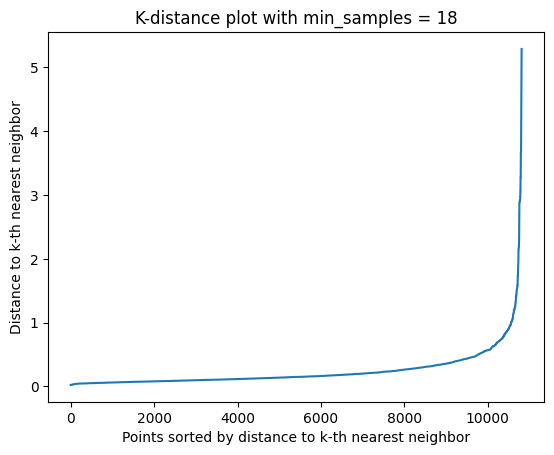

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Choose min_samples (commonly 4-10)
min_samples = 18

# Fit NearestNeighbors to calculate k-distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_preprocessed_dbscan)
distances, indices = neighbors_fit.kneighbors(df_preprocessed_dbscan)

# Sort distances in ascending order
distances = np.sort(distances[:, -1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title(f"K-distance plot with min_samples = {min_samples}")
plt.xlabel("Points sorted by distance to k-th nearest neighbor")
plt.ylabel("Distance to k-th nearest neighbor")
plt.show()

In [34]:
dbclust = DBSCAN(eps = 4, min_samples = 50).fit(df_preprocessed_clustering)
print(len(set(dbclust.labels_)))

14


In [35]:
df_prod_res = df_preprocessed_clustering.copy()
df_prod_res['label_db'] = dbclust.labels_

In [36]:
descr_bk = df_prod_res.reset_index(drop=True).groupby(['label_db']).describe()
print(descr_bk.T)

label_db                        -1            0          1           2   \
study_satisfaction count  77.000000  9101.000000  65.000000  170.000000   
                   mean    0.124392     0.342591  -0.336155    0.115274   
                   std     0.435560     1.171534   0.229400    0.717084   
                   min    -0.513606    -0.513606  -0.513606   -0.513606   
                   25%    -0.039902    -0.400160  -0.457939   -0.419662   
...                             ...          ...        ...         ...   
future_insecurity  min    -0.192624    -0.405167  -0.405167    7.559002   
                   25%     0.041374    -0.306366  -0.389498    7.559002   
                   50%     0.153441    -0.061997  -0.367529    7.559002   
                   75%     4.136225     0.483600  -0.344208    7.559002   
                   max     7.559002     7.559002  -0.319389    7.559002   

label_db                          3          4          5          6   \
study_satisfaction count  

In [37]:
from sklearn.metrics import silhouette_score as shs
shs(df_prod_res,df_prod_res['label_db'])

np.float64(0.5202455058608265)

In [38]:
#import seaborn as sns
#sns.pairplot(df_prod_res, hue='label_db')

# HDBSCAN

In [39]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [40]:
df_preprocessed_hdbs = df_preprocessed_clustering.copy()

In [41]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=100)
#clusterer = hdbscan.HDBSCAN(min_samples=50, min_cluster_size=100)
labels = clusterer.fit_predict(df_preprocessed_hdbs)

noise_points = np.sum(labels == -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters: {n_clusters}, Porcentaje de ruido: {noise_points / len(labels) * 100:.2f}%")


Número de clusters: 9, Porcentaje de ruido: 10.53%


In [42]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_preprocessed_hdbs, labels)
print(f"Silueta: {silhouette_avg}")

Silueta: 0.5295808595519188


In [43]:
import hdbscan
from sklearn.metrics import silhouette_score

# Rango de valores para min_samples y min_cluster_size
min_samples_values = [5, 10, 20, 50, 100]  # Puedes ajustar según tus datos
min_cluster_size_values = [50, 100, 150, 200]

best_silhouette = -1  # Inicializamos con el peor valor posible para silueta
best_params = None
best_labels = None

# Iterar sobre todas las combinaciones de min_samples y min_cluster_size
for min_samples in min_samples_values:
    for min_cluster_size in min_cluster_size_values:
        # Crear el modelo HDBSCAN
        clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        
        # Ajustar el modelo a los datos (df_preprocessed_hdbs es tu DataFrame)
        labels = clusterer.fit_predict(df_preprocessed_hdbs)  # Usamos df_preprocessed_hdbs aquí
        
        # Evitar cálculo de la silueta si hay ruido solo (cuando todos los puntos son ruido o hay pocos clusters)
        if len(set(labels)) > 1 and -1 in labels:
            # Calcular el coeficiente de silueta solo si hay más de un cluster y hay ruido
            silhouette_avg = silhouette_score(df_preprocessed_hdbs, labels)
            
            # Si obtenemos una mejor silueta, guardamos el modelo
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_params = (min_samples, min_cluster_size)
                best_labels = labels

        print(f"min_samples={min_samples}, min_cluster_size={min_cluster_size}, Silueta={silhouette_avg if 'silhouette_avg' in locals() else 'N/A'}")

# Mostrar el mejor conjunto de parámetros y la silueta obtenida
print(f"\nMejor Silueta: {best_silhouette:.3f} con min_samples={best_params[0]} y min_cluster_size={best_params[1]}")


min_samples=5, min_cluster_size=50, Silueta=0.34884105271080557
min_samples=5, min_cluster_size=100, Silueta=0.18405223834252102
min_samples=5, min_cluster_size=150, Silueta=-0.03661202767202224
min_samples=5, min_cluster_size=200, Silueta=0.45125553570605875
min_samples=10, min_cluster_size=50, Silueta=0.3426414715612588
min_samples=10, min_cluster_size=100, Silueta=0.15045721663411984
min_samples=10, min_cluster_size=150, Silueta=0.4331478895399978
min_samples=10, min_cluster_size=200, Silueta=0.4505716900360496
min_samples=20, min_cluster_size=50, Silueta=0.2787091593253631
min_samples=20, min_cluster_size=100, Silueta=0.12407425190397658
min_samples=20, min_cluster_size=150, Silueta=0.4550885705228356
min_samples=20, min_cluster_size=200, Silueta=0.45677735142671266
min_samples=50, min_cluster_size=50, Silueta=0.34388479840427627
min_samples=50, min_cluster_size=100, Silueta=0.4335991742303954
min_samples=50, min_cluster_size=150, Silueta=0.5188147178504187
min_samples=50, min_clus

# GMM

In [44]:
df_preprocessed_GMM = pca_df.copy()

In [45]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
labels = gmm.fit_predict(df_preprocessed_GMM)

In [46]:
df_preprocessed_GMM['cluster'] = labels  # Agregar las etiquetas al DataFrame

In [47]:
descriptive_stats = df_preprocessed_GMM.groupby('cluster').agg(['mean', 'std'])
print(descriptive_stats)

              PC1                 PC2                 PC3                 PC4  \
             mean       std      mean       std      mean       std      mean   
cluster                                                                         
0       -1.936724  0.752939  0.743586  0.894955 -0.581213  0.773040  0.056056   
1        3.234355  4.301071 -2.902125  2.291350 -1.044413  2.018267  1.161959   
2        6.378328  4.338415  5.588051  2.366342  4.532981  2.348816 -0.146617   
3       -2.010965  1.551051 -5.038930  1.000823  5.657323  0.305652 -0.154444   
4        0.484453  2.094962  0.172925  0.948329 -1.737653  0.884729 -0.649384   

                   
              std  
cluster            
0        0.426436  
1        4.150659  
2        2.363865  
3        2.208447  
4        1.507394  


In [48]:
from sklearn.metrics import silhouette_score as shs
shs(df_preprocessed_GMM.drop(columns=['cluster']), df_preprocessed_GMM['cluster'])

np.float64(0.30023596412179937)

# K-MEDOIDS

In [ ]:
#pip install pyclustering


In [50]:
df_preprocessed_kmedoids = pca_df.copy()

In [66]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
import numpy as np

# Número de clusters
n_clusters = 4

# Inicializar los medoids
initial_medoids = np.random.choice(df_preprocessed_kmedoids.shape[0], n_clusters, replace=False)

# Ajustar el modelo K-Medoids
kmedoids_model = kmedoids(df_preprocessed_kmedoids.values, initial_medoids.tolist())
kmedoids_model.process()

# Obtener las etiquetas de los clusters como listas de índices
clusters = kmedoids_model.get_clusters()

# Crear un array de etiquetas donde cada posición representa el cluster asignado
labels_array = np.empty(df_preprocessed_kmedoids.shape[0], dtype=int)
for cluster_id, indices in enumerate(clusters):
    labels_array[indices] = cluster_id

# Asignar las etiquetas al DataFrame
df_preprocessed_kmedoids['label'] = labels_array

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(df_preprocessed_kmedoids.drop('label', axis=1), labels_array, metric='manhattan')
print(f"Silueta de K-Medoids: {silhouette_avg:.3f}")


Silueta de K-Medoids: 0.611


In [63]:
descriptive_stats_kmedoids = df_preprocessed_kmedoids.groupby('label').agg(['mean', 'std'])
print(descriptive_stats)

              PC1                 PC2                 PC3                 PC4  \
             mean       std      mean       std      mean       std      mean   
cluster                                                                         
0       -1.936724  0.752939  0.743586  0.894955 -0.581213  0.773040  0.056056   
1        3.234355  4.301071 -2.902125  2.291350 -1.044413  2.018267  1.161959   
2        6.378328  4.338415  5.588051  2.366342  4.532981  2.348816 -0.146617   
3       -2.010965  1.551051 -5.038930  1.000823  5.657323  0.305652 -0.154444   
4        0.484453  2.094962  0.172925  0.948329 -1.737653  0.884729 -0.649384   

                   
              std  
cluster            
0        0.426436  
1        4.150659  
2        2.363865  
3        2.208447  
4        1.507394  


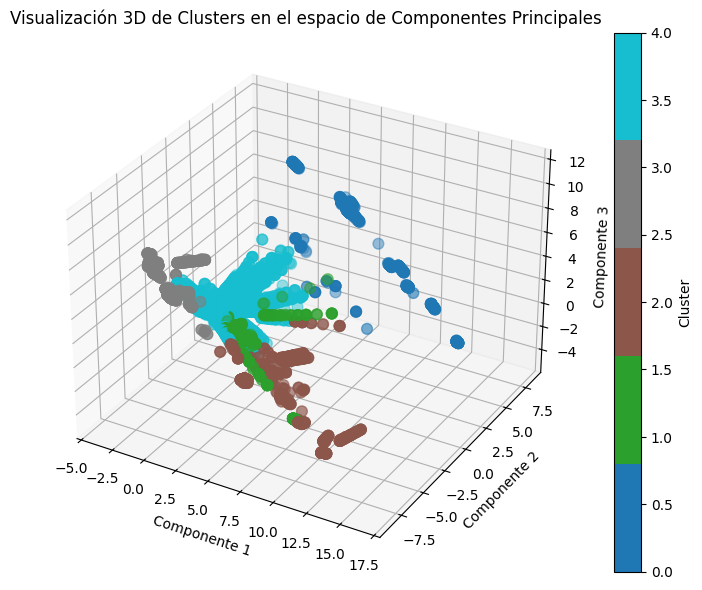

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Usamos las primeras 3 componentes principales de pca_df
pca_3d = pca_df.iloc[:, :3]  # Seleccionamos las primeras 3 componentes principales

# Crear una lista de colores para cada cluster
num_clusters = len(np.unique(labels_array))  # Número de clusters
colors = plt.cm.get_cmap('tab10', num_clusters)  # Colormap con colores únicos para los clusters

# Crear la figura para la visualización 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D, asignando un color distinto por cluster
scatter = ax.scatter(
    pca_3d.iloc[:, 0],  # Componente 1
    pca_3d.iloc[:, 1],  # Componente 2
    pca_3d.iloc[:, 2],  # Componente 3
    c=labels_array,     # Etiquetas de los clusters
    cmap=colors,        # Mapa de colores
    s=60                # Tamaño de los puntos
)

# Añadir título y etiquetas
ax.set_title('Visualización 3D de Clusters en el espacio de Componentes Principales')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Añadir una barra de colores para identificar los clusters
fig.colorbar(scatter, label='Cluster')

# Mostrar la gráfica
plt.show()


In [65]:
import plotly.express as px
import pandas as pd

# Crear un DataFrame que combine las componentes principales y las etiquetas
pca_3d['Cluster'] = labels_array  # Agregar las etiquetas como una columna al DataFrame

# Crear el gráfico 3D interactivo
fig = px.scatter_3d(
    pca_3d,
    x=pca_3d.columns[0],  # Componente 1
    y=pca_3d.columns[1],  # Componente 2
    z=pca_3d.columns[2],  # Componente 3
    color='Cluster',      # Colorear por cluster
    title='Visualización 3D de Clusters en el espacio de Componentes Principales',
    labels={
        pca_3d.columns[0]: 'Componente 1',
        pca_3d.columns[1]: 'Componente 2',
        pca_3d.columns[2]: 'Componente 3',
        'Cluster': 'Cluster'
    },
    template='plotly'
)

# Personalizar el tamaño del gráfico
fig.update_traces(marker=dict(size=5))  # Tamaño de los puntos
fig.update_layout(
    scene=dict(
        xaxis_title='Componente 1',
        yaxis_title='Componente 2',
        zaxis_title='Componente 3'
    )
)

# Mostrar el gráfico
fig.show()


# Mean-shift clustering

In [223]:
df_preprocessed_MSC = pca_df.copy()

In [224]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# Aplicamos MeanShift a tu dataset preprocesado
bandwidth = estimate_bandwidth(pca_df, quantile=0.2, n_samples=500)
mean_shift = MeanShift(bandwidth=bandwidth)  # 'bandwidth' controla el radio de los vecindarios de densidad
labels = mean_shift.fit_predict(pca_df)

In [225]:
silhouette_avg_msc = silhouette_score(df_preprocessed_MSC, labels)
print(f"Silueta de Mean-Shift Clustering: {silhouette_avg_msc:.3f}")

Silueta de Mean-Shift Clustering: 0.613


# OPTICS

In [220]:
df_preprocessed_optics = pca_df.copy()

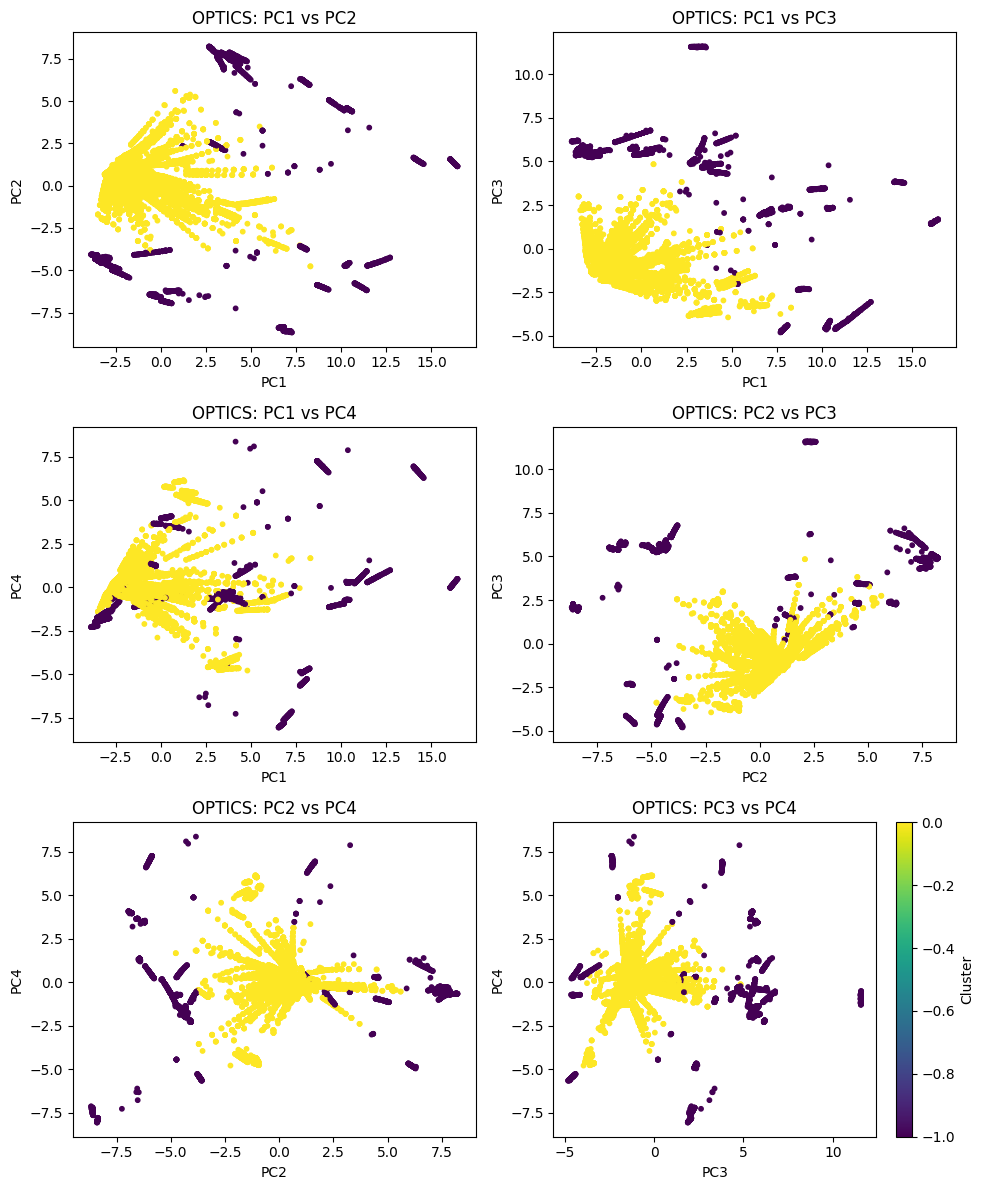

In [221]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(df_preprocessed_optics)

# Agregar las etiquetas de clusters
df_preprocessed_optics['Cluster'] = labels

# Visualizar resultados usando pares de componentes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(10, 12))  # Gráficos en pares
axes = axes.flatten()
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]  # Pares de componentes

for i, (comp1, comp2) in enumerate(pairs):
    scatter = axes[i].scatter(df_preprocessed_optics.iloc[:, comp1], df_preprocessed_optics.iloc[:, comp2], 
                              c=df_preprocessed_optics['Cluster'], cmap='viridis', s=10)
    axes[i].set_xlabel(f'PC{comp1+1}')
    axes[i].set_ylabel(f'PC{comp2+1}')
    axes[i].set_title(f'OPTICS: PC{comp1+1} vs PC{comp2+1}')

plt.colorbar(scatter, ax=axes[-1], label='Cluster')
plt.tight_layout()
plt.show()